In [7]:
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine("mysql+pymysql://root:@localhost:3311/classicmodels")
print("successful connection")
 


successful connection


In [13]:
from sqlalchemy import create_engine
import pandas as pd

# Set up SQLAlchemy engine for MySQL connection
username = 'root'  # Replace with your MySQL username
password = ''  # Replace with your MySQL password
host = 'localhost'
port = '3311'
database = 'classicmodels'




In [ ]:
# Create the engine using the MySQL URL with the port number included
engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}')

# Extract relevant tables from the database using pandas and the SQLAlchemy engine
customers = pd.read_sql("SELECT * FROM customers", engine)
orders = pd.read_sql("SELECT * FROM orders", engine)
order_details = pd.read_sql("SELECT * FROM orderdetails", engine)
products = pd.read_sql("SELECT * FROM products", engine)

# Display the first few rows of one of the tables to ensure it works
customers.head()

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370.0,21000.0
1,112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,None,Las Vegas,NV,83030,USA,1166.0,71800.0
2,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611.0,117300.0
3,119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",None,Nantes,None,44000,France,1370.0,118200.0
4,121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,None,Stavern,None,4110,Norway,1504.0,81700.0


In [15]:
# Clean the data (e.g., handle missing values, convert date formats)
orders['orderDate'] = pd.to_datetime(orders['orderDate'])
order_details['priceEach'] = order_details['priceEach'].fillna(order_details['priceEach'].mean())  # Fill missing values

# Merge dataframes (combine customer, order, and product data)
merged_data = pd.merge(order_details, products, on="productCode")
merged_data = pd.merge(merged_data, orders, on="orderNumber")
merged_data = pd.merge(merged_data, customers, on="customerNumber")

# Cleaned and merged data ready for analysis
merged_data.head()

,orderNumber,productCode,quantityOrdered,priceEach,orderLineNumber,productName,productLine,productScale,productVendor,productDescription,...,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,10100,S18_1749,30,136.00,3,1917 Grand Touring Sedan,Vintage Cars,1:18,Welly Diecast Productions,This 1:18 scale replica of the 1917 Grand Tour...,...,Dorothy,6035558647,2304 Long Airport Avenue,None,Nashua,NH,62005,USA,1216.0,114200.0
1,10100,S18_2248,50,55.09,2,1911 Ford Town Car,Vintage Cars,1:18,Motor City Art Classics,"Features opening hood, opening doors, opening ...",...,Dorothy,6035558647,2304 Long Airport Avenue,None,Nashua,NH,62005,USA,1216.0,114200.0
2,10100,S18_4409,22,75.46,4,1932 Alfa Romeo 8C2300 Spider Sport,Vintage Cars,1:18,Exoto Designs,This 1:18 scale precision die cast replica fea...,...,Dorothy,6035558647,2304 Long Airport Avenue,None,Nashua,NH,62005,USA,1216.0,114200.0
3,10100,S24_3969,49,35.29,1,1936 Mercedes Benz 500k Roadster,Vintage Cars,1:24,Red Start Diecast,This model features grille-mounted chrome horn...,...,Dorothy,6035558647,2304 Long Airport Avenue,None,Nashua,NH,62005,USA,1216.0,114200.0
4,10101,S18_2325,25,108.06,4,1932 Model A Ford J-Coupe,Vintage Cars,1:18,Autoart Studio Design,This model features grille-mounted chrome horn...,...,Roland,+49 69 66 90 2555,Lyonerstr. 34,None,Frankfurt,None,60528,Germany,1504.0,59700.0


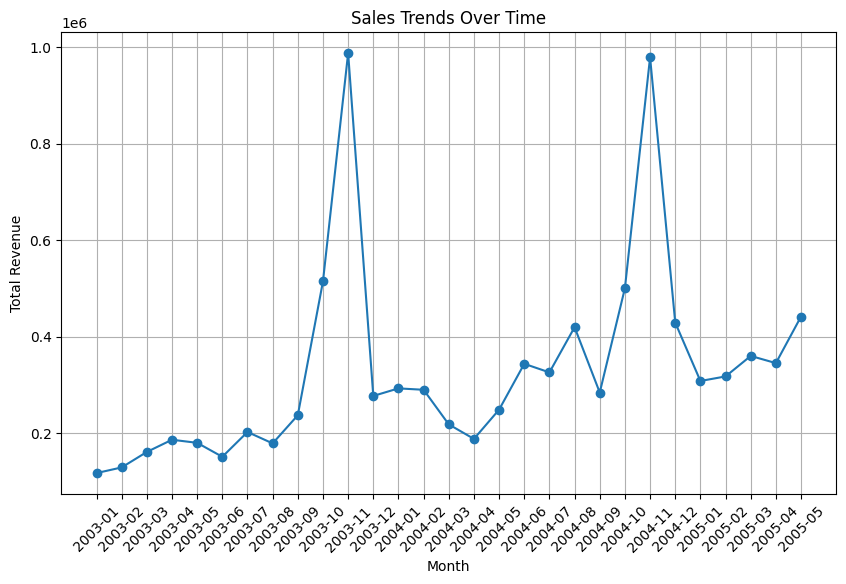

In [16]:
import matplotlib.pyplot as plt

# Convert orderDate to datetime and extract month/year
merged_data['orderMonth'] = merged_data['orderDate'].dt.to_period('M')

# Calculate total revenue per month
merged_data['revenue'] = merged_data['priceEach'] * merged_data['quantityOrdered']
monthly_sales = merged_data.groupby('orderMonth')['revenue'].sum().reset_index()

# Plot the sales trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['orderMonth'].astype(str), monthly_sales['revenue'], marker='o')
plt.title("Sales Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


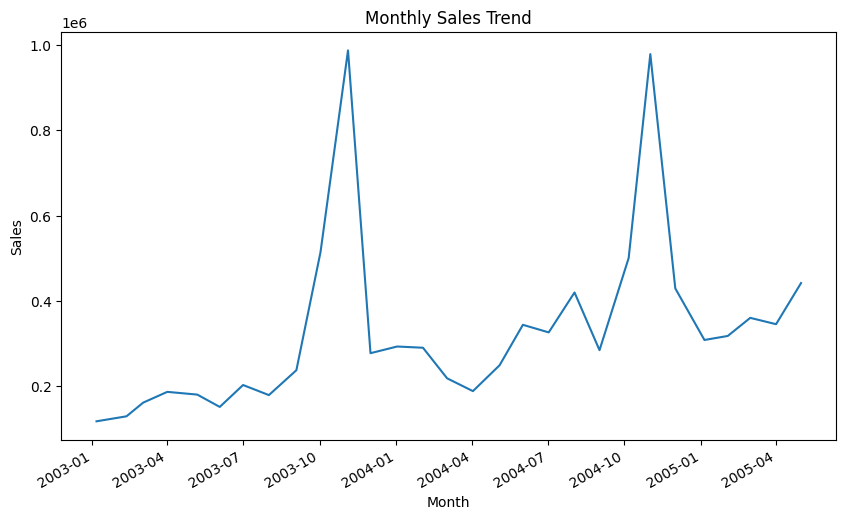

C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecas

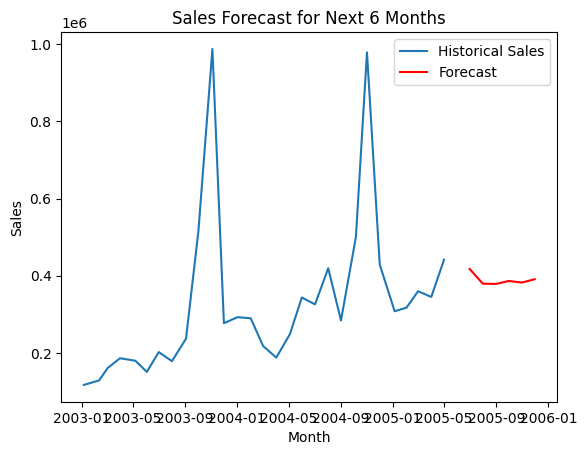

In [24]:

from statsmodels.tsa.arima.model import ARIMA  # Import ARIMA model

# Load sales data (aggregating by month)
query = """
SELECT
    o.orderDate,
    SUM(od.quantityOrdered * od.priceEach) AS monthly_sales
FROM orders o
JOIN orderdetails od ON o.orderNumber = od.orderNumber
GROUP BY YEAR(o.orderDate), MONTH(o.orderDate)
ORDER BY o.orderDate;
"""
sales_data = pd.read_sql(query, engine)

# Convert the orderDate to datetime and set it as the index
sales_data['orderDate'] = pd.to_datetime(sales_data['orderDate'])
sales_data.set_index('orderDate', inplace=True)

# Plot the sales data to see the trend
sales_data['monthly_sales'].plot(title="Monthly Sales Trend", figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

# Fit an ARIMA model to the data
model = ARIMA(sales_data['monthly_sales'], order=(5, 1, 0))  # Adjust the order as necessary
model_fit = model.fit()

# Make predictions for the next 6 months
forecast = model_fit.forecast(steps=6)

# Plot the forecasted values
plt.plot(sales_data.index, sales_data['monthly_sales'], label='Historical Sales')
plt.plot(pd.date_range(start=sales_data.index[-1], periods=7, freq='M')[1:], forecast, label='Forecast', color='red')
plt.legend()
plt.title('Sales Forecast for Next 6 Months')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()





In [18]:
from sklearn.cluster import KMeans

# Calculate customer purchase frequency
customer_purchases = merged_data.groupby('customerNumber')['orderNumber'].nunique().reset_index()
customer_purchases.columns = ['customerNumber', 'purchase_frequency']

# Apply KMeans clustering to categorize customers based on purchase frequency
kmeans = KMeans(n_clusters=3, random_state=0)
customer_purchases['customer_cluster'] = kmeans.fit_predict(customer_purchases[['purchase_frequency']])

# Display clusters
customer_purchases.head()


,customerNumber,purchase_frequency,customer_cluster
0,103,3,0
1,112,3,0
2,114,5,0
3,119,4,0
4,121,4,0


C:\Users\PC\AppData\Local\Temp\ipykernel_2916\2894372612.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


Topic 1:
['renegotiate', 'dhl', 'customer', 'shipping', 'requested', 'used']


Topic 2:
['color', 'finance', 'reevaluate', 'agreement', 'terms', 'want']


Topic 3:
['vp', 'custom', 'sent', 'sales', 'instructions', 'warehouse']


Topic 4:
['ship', 'exceeded', 'received', 'credit', 'payment', 'limit']


Topic 5:
['purchases', 'buying', 'interested', 'ferrari', 'check', 'availability']




C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:733: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  x = np.array(x, subok=True, copy=copy)


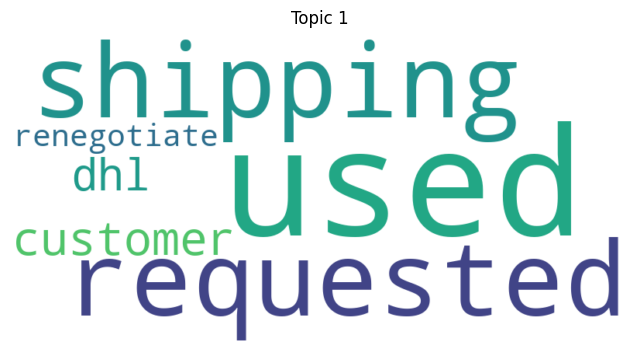

C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:733: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  x = np.array(x, subok=True, copy=copy)


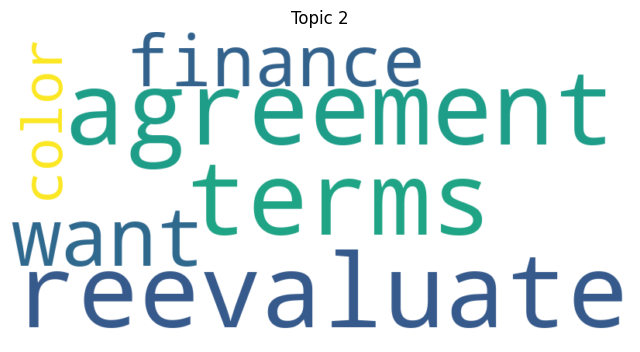

C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:733: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  x = np.array(x, subok=True, copy=copy)


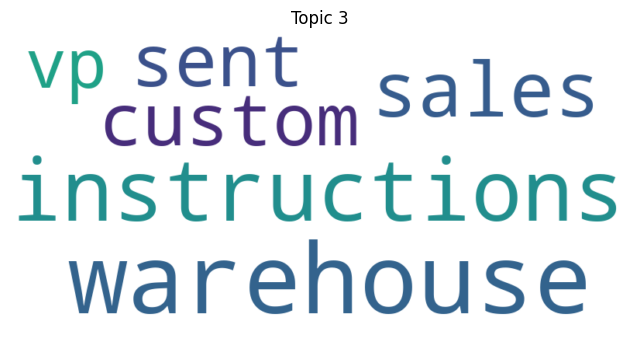

C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:733: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  x = np.array(x, subok=True, copy=copy)


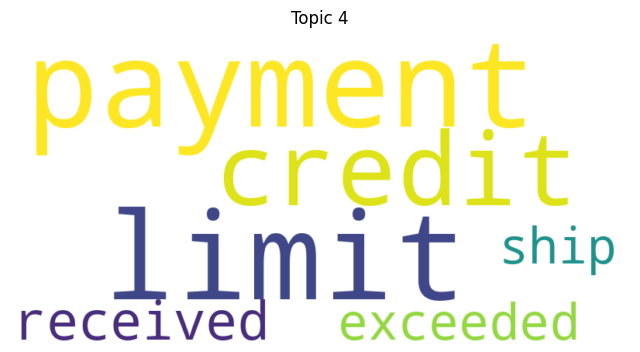

C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:733: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  x = np.array(x, subok=True, copy=copy)


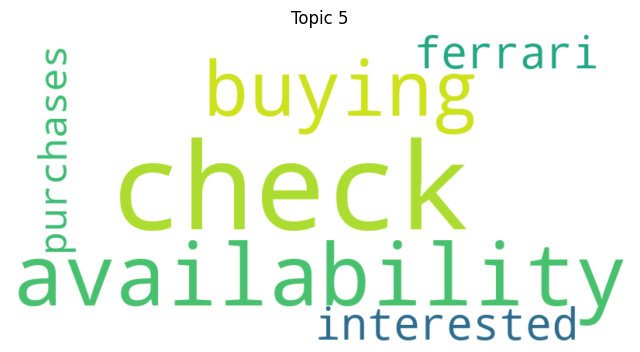

In [36]:
 
import pandas as pd
import mysql.connector
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Connect to the database and fetch the comments from the orders table
connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='',
    database='classicmodels',
    port=3311
)

# Fetch the comments column
query = "SELECT comments FROM orders WHERE comments IS NOT NULL"
df = pd.read_sql(query, connection)

# Close the database connection
connection.close()

# Preprocessing the text data
# Remove any null values or empty strings
df = df.dropna(subset=['comments'])
df['comments'] = df['comments'].apply(lambda x: x.lower())  # Optional: Convert to lowercase for consistency

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['comments'])

# Apply LDA for topic modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # 5 topics, adjust as needed
lda.fit(X)

# Get the top words for each topic
n_words = 6
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-n_words:]])
    print("\n")

# Create word clouds for each topic
for idx, topic in enumerate(lda.components_):
    word_freq = {vectorizer.get_feature_names_out()[i]: topic[i] for i in topic.argsort()[-n_words:]}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic {idx + 1}")
    plt.axis('off')
    plt.show()



In [41]:
import mysql.connector
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
import matplotlib.pyplot as plt

# Step 1: Connect to the database and fetch the comments
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="classicmodels",
    port=3311
)



C:\Users\PC\AppData\Local\Temp\ipykernel_2916\1445425111.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sentiment = df.resample('M')['sentiment_score'].mean()


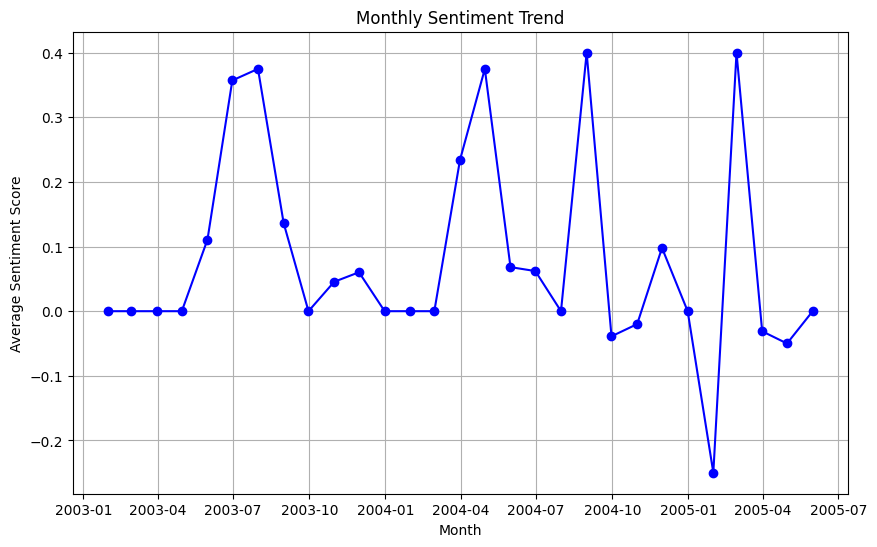

C:\Users\PC\AppData\Local\Temp\ipykernel_2916\1445425111.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(monthly_sentiment.index[-1] + pd.DateOffset(months=1), periods=6, freq='M')


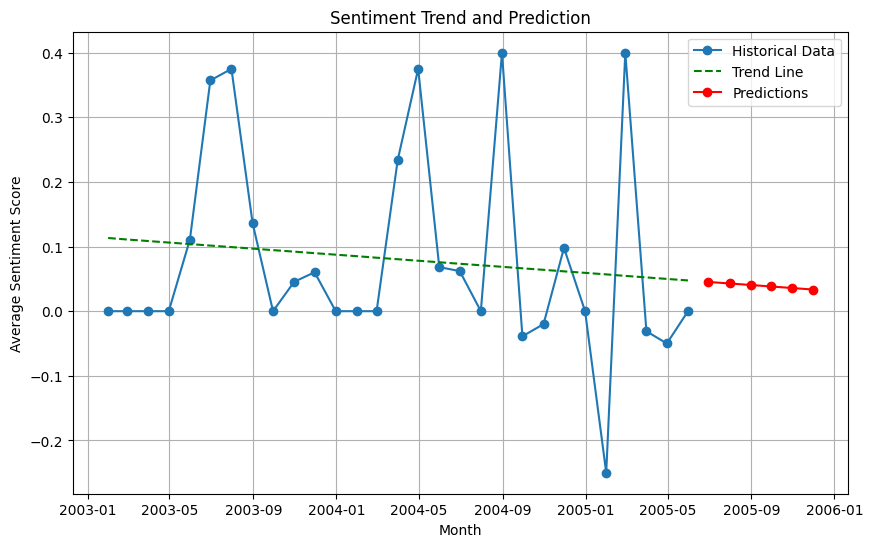

Future Sentiment Predictions (Next 6 months):
2005-06: Predicted Sentiment Score = 0.05
2005-07: Predicted Sentiment Score = 0.04
2005-08: Predicted Sentiment Score = 0.04
2005-09: Predicted Sentiment Score = 0.04
2005-10: Predicted Sentiment Score = 0.04
2005-11: Predicted Sentiment Score = 0.03


In [43]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.linear_model import LinearRegression
import numpy as np

# Step 1: Create a SQLAlchemy engine
engine = create_engine('mysql+mysqlconnector://root:@localhost:3311/classicmodels')

# Step 2: Ensure connection is established
try:
    with engine.connect() as connection:
        # Query the database
        query = "SELECT comments, orderDate FROM orders WHERE comments IS NOT NULL"
        df = pd.read_sql(query, connection)

        # Step 3: Ensure 'orderDate' is datetime
        df['orderDate'] = pd.to_datetime(df['orderDate'])
        df.set_index('orderDate', inplace=True)

        # Step 4: Perform sentiment analysis
        def get_sentiment(comment):
            return TextBlob(comment).sentiment.polarity

        df['sentiment_score'] = df['comments'].apply(get_sentiment)

        # Step 5: Aggregate sentiment scores by month
        monthly_sentiment = df.resample('M')['sentiment_score'].mean()
        monthly_sentiment.index.name = 'Month'

        # Step 6: Visualize trends
        plt.figure(figsize=(10, 6))
        plt.plot(monthly_sentiment.index, monthly_sentiment.values, marker='o', linestyle='-', color='blue')
        plt.title('Monthly Sentiment Trend')
        plt.xlabel('Month')
        plt.ylabel('Average Sentiment Score')
        plt.grid(True)
        plt.show()

        # Step 7: Predict future sentiment
        X = np.array(range(len(monthly_sentiment))).reshape(-1, 1)  # Months as integers
        y = monthly_sentiment.values

        model = LinearRegression()
        model.fit(X, y)

        # Predict next 6 months
        future_months = np.arange(len(monthly_sentiment), len(monthly_sentiment) + 6).reshape(-1, 1)
        predictions = model.predict(future_months)

        # Plot future sentiment
        future_dates = pd.date_range(monthly_sentiment.index[-1] + pd.DateOffset(months=1), periods=6, freq='M')
        plt.figure(figsize=(10, 6))
        plt.plot(monthly_sentiment.index, monthly_sentiment.values, marker='o', label='Historical Data')
        plt.plot(monthly_sentiment.index, model.predict(X), color='green', linestyle='--', label='Trend Line')
        plt.plot(future_dates, predictions, marker='o', color='red', label='Predictions')
        plt.title('Sentiment Trend and Prediction')
        plt.xlabel('Month')
        plt.ylabel('Average Sentiment Score')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Print predictions
        print("Future Sentiment Predictions (Next 6 months):")
        for date, score in zip(future_dates, predictions):
            print(f"{date.strftime('%Y-%m')}: Predicted Sentiment Score = {score:.2f}")

except Exception as e:
    print(f"Error occurred: {e}")


C:\Users\PC\AppData\Local\Temp\ipykernel_2916\4130138902.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)
C:\Users\PC\AppData\Local\Temp\ipykernel_2916\4130138902.py:36: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


OperationalError: MySQL Connection not available